In [17]:
#beginning stages of project. exploratory work

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Intro 
* basic exploration 
*  

In [19]:
stats = pd.read_csv('stats.csv')

In [20]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14573 entries, 0 to 14572
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      14573 non-null  int64  
 1   Player  14573 non-null  object 
 2   Pos     14573 non-null  object 
 3   Age     14573 non-null  int64  
 4   Tm      14573 non-null  object 
 5   G       14573 non-null  int64  
 6   GS      14573 non-null  int64  
 7   MP      14573 non-null  float64
 8   FG      14573 non-null  float64
 9   FGA     14573 non-null  float64
 10  FG%     14485 non-null  float64
 11  3P      14573 non-null  float64
 12  3PA     14573 non-null  float64
 13  3P%     12375 non-null  float64
 14  2P      14573 non-null  float64
 15  2PA     14573 non-null  float64
 16  2P%     14419 non-null  float64
 17  eFG%    14485 non-null  float64
 18  FT      14573 non-null  float64
 19  FTA     14573 non-null  float64
 20  FT%     13824 non-null  float64
 21  ORB     14573 non-null  float64
 22

In [21]:
stats.describe().T

,count,mean,std,min,25%,50%,75%,max
Rk,14573.0,244.332876,139.596859,1.0,124.000,243.000,361.000,605.0
Age,14573.0,26.705483,4.252495,18.0,23.000,26.000,30.000,44.0
G,14573.0,45.544500,26.110389,1.0,22.000,48.000,70.000,85.0
GS,14573.0,21.565429,27.035594,0.0,0.000,7.000,39.000,83.0
MP,14573.0,19.623626,9.957188,0.0,11.400,18.900,27.700,43.7
FG,14573.0,2.932046,2.133970,0.0,1.300,2.400,4.100,12.2
FGA,14573.0,6.598586,4.541544,0.0,3.100,5.500,9.200,27.8
FG%,14485.0,0.432377,0.104592,0.0,0.393,0.435,0.479,1.0
3P,14573.0,0.590894,0.698191,0.0,0.000,0.300,1.000,5.3
3PA,14573.0,1.703637,1.840081,0.0,0.100,1.100,2.800,13.2


# Initial exploratory ideas/questions 
* what stats can be added into the dataframe
    * TS% -> `pts / 2(FGA + (.44 X FTA))`
    * tFGA (total field goal attempts) -> `stats['tFGA'] = round(stats['FGA'] * stats['G'], 0)`
    * tFTA
    * t3PA
    * t2PA
    * tTSA
* what categories can be added into the frame
    * starter -> whether or not a player starts more than 50% of games played 
    

In [22]:
league_average_stats_by_year = stats.groupby(by='Year').mean()

In [23]:
stats['TS%'] = stats['PTS'] / (2 * (stats['FGA'] + (.44 * stats['FTA'])))

In [24]:
stats['tFGA'] = round(stats['FGA'] * stats['G'], 0)

In [25]:
stats['tFTA'] = round(stats['FTA'] * stats['G'], 0)

In [26]:
stats['t3PA'] = round(stats['3PA'] * stats['G'], 0)

In [27]:
stats['t2PA'] = round(stats['2PA'] * stats['G'], 0)

In [28]:
stats['tTSA'] = stats['tFGA'] + stats['tFTA']

In [29]:
stats['Starter'] = np.where(stats['GS'] / stats['G'] > .50, 'Yes', 'No')

In [30]:
stats.Starter

0         No
1         No
2        Yes
3         No
4         No
        ... 
14568     No
14569    Yes
14570     No
14571     No
14572    Yes
Name: Starter, Length: 14573, dtype: object

In [43]:
stats['GS']/ stats['G'] < 50 

0        True
1        True
2        True
3        True
4        True
         ... 
14568    True
14569    True
14570    True
14571    True
14572    True
Length: 14573, dtype: bool

## Create Subsets

In [15]:
mask = stats['Pos'].str.contains(r'[CF]', regex=True)
frontcourt =  stats[mask]

mask = stats['Pos'].str.contains(r'[G]', regex=True)
backcourt = stats[mask]

In [33]:
mask = stats['Starter'] == "Yes"
starters = stats[mask]

In [34]:
starters

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PF,PTS,Year,TS%,tFGA,tFTA,t3PA,t2PA,tTSA,Starter
2,3,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,...,2.5,22.3,1997-1998,0.562223,1345.0,640.0,49.0,1296.0,1985.0,Yes
5,4,Cory Alexander,PG,24,DEN,23,19,34.7,4.8,11.1,...,2.0,14.0,1997-1998,0.567629,255.0,64.0,113.0,143.0,319.0,Yes
6,5,Ray Allen*,SG,22,MIL,82,82,40.1,6.9,16.0,...,3.0,19.5,1997-1998,0.538317,1312.0,394.0,369.0,943.0,1706.0,Yes
9,8,Kenny Anderson,PG,27,TOT,61,56,30.5,4.4,11.0,...,2.2,12.2,1997-1998,0.491618,671.0,195.0,159.0,512.0,866.0,Yes
10,8,Kenny Anderson,PG,27,POR,45,40,32.7,4.5,11.7,...,2.2,12.6,1997-1998,0.480623,526.0,144.0,135.0,396.0,670.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14550,589,Robert Williams,C,24,BOS,61,61,29.6,4.4,6.0,...,2.2,10.0,2021-2022,0.750751,366.0,92.0,0.0,366.0,458.0,Yes
14556,593,Justise Winslow,SF,25,POR,11,10,26.8,4.3,10.5,...,1.9,10.7,2021-2022,0.464732,116.0,25.0,37.0,79.0,141.0,Yes
14558,595,Christian Wood,C,26,HOU,68,67,30.8,6.5,12.9,...,2.5,17.9,2021-2022,0.594447,877.0,333.0,333.0,544.0,1210.0,Yes
14569,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,1.7,28.4,2021-2022,0.603947,1543.0,555.0,608.0,935.0,2098.0,Yes


## Explore Shooting
* Min 500+ tTSA (true shooting attempts)
* Min 100+ FT (free throw attempts)
* Min 55+ 3p (3 point attempts)
* Explore by:
    * Position (Frontcourt/Backcourt)
    * 
 

In [16]:
true_shooting = stats[stats['tTSA'] > 500]\
                    .sort_values(by=['TS%'],ascending=False)


In [17]:
tsa_by_year = true_shooting.groupby(by='Year').mean()['TS%']

In [18]:
tsa_by_year

Year
1997-1998    0.526003
1998-1999    0.517327
1999-2000    0.523334
2000-2001    0.520977
2001-2002    0.524454
2002-2003    0.525032
2003-2004    0.521361
2004-2005    0.532129
2005-2006    0.539587
2006-2007    0.545078
2007-2008    0.542529
2008-2009    0.549134
2009-2010    0.544455
2010-2011    0.544749
2011-2012    0.534242
2012-2013    0.537962
2013-2014    0.542872
2014-2015    0.537320
2015-2016    0.541413
2016-2017    0.553291
2017-2018    0.557922
2018-2019    0.561576
2019-2020    0.567635
2020-2021    0.577682
2021-2022    0.570309
Name: TS%, dtype: float64

In [19]:
5*(1.1)

5.5

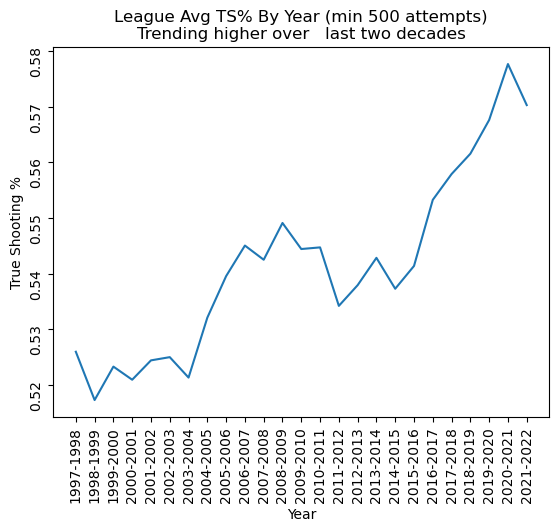

In [20]:
fig, ax = plt.subplots()
ax.plot(tsa_by_year)
ax.set_title('League Avg TS% By Year (min 500 attempts)\nTrending higher over   last two decades')
ax.set_ylabel('True Shooting %')
ax.set_xlabel('Year')
ax.tick_params(rotation=90)



In [21]:
true_shooting.sort_values(by='Year')

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV,PF,PTS,Year,TS%,tFGA,tFTA,t3PA,t2PA,tTSA
411,355,Brian Shaw,PG,31,TOT,59,34,25.9,2.6,7.6,...,1.7,2.5,6.3,1997-1998,0.393947,448.0,53.0,94.0,348.0,501.0
378,332,Glenn Robinson,SF,25,MIL,56,56,41.0,9.5,20.3,...,3.6,2.9,23.4,1997-1998,0.522042,1137.0,269.0,67.0,1070.0,1406.0
354,314,Mark Price,PG,33,ORL,63,33,22.7,3.6,8.4,...,2.6,1.5,9.5,1997-1998,0.521749,529.0,101.0,158.0,378.0,630.0
360,318,Khalid Reeves,PG,25,DAL,82,54,23.8,3.0,7.2,...,1.6,2.4,8.7,1997-1998,0.521333,590.0,213.0,156.0,443.0,803.0
150,128,Michael Finley,SF,24,DAL,82,82,41.4,8.2,18.4,...,2.7,2.0,21.5,1997-1998,0.520732,1509.0,418.0,246.0,1263.0,1927.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14037,214,Tyrese Haliburton,SG-PG,21,TOT,77,77,35.0,5.6,11.8,...,2.6,1.6,15.3,2021-2022,0.593023,909.0,192.0,393.0,524.0,1101.0
14245,358,Tyrese Maxey,PG,21,PHI,75,74,35.3,6.4,13.3,...,1.2,2.1,17.5,2021-2022,0.593140,998.0,248.0,308.0,682.0,1246.0
14312,409,Georges Niang,PF,28,PHI,76,7,22.8,3.2,7.4,...,0.8,2.5,9.2,2021-2022,0.593395,562.0,61.0,388.0,175.0,623.0
14440,509,Marcus Smart,PG,27,BOS,71,71,32.3,4.2,10.1,...,2.2,2.3,12.1,2021-2022,0.540179,717.0,178.0,362.0,355.0,895.0


### Look at TS% by position (frontcourt/backcourt)
* 

In [22]:
import re 
p = re.compile('[FC]')

#tsa_frontcourt = true_shooting[true_shooting['Pos'].str.contains(['F','C'])]\
#                    .groupby(by='Year').mean()['TS%']

mask = true_shooting['Pos'].str.contains(r'[CF]', regex=True)
tsa_frontcourt =  true_shooting[mask]

mask = true_shooting['Pos'].str.contains(r'[G]', regex=True)
tsa_backcourt = true_shooting[mask]




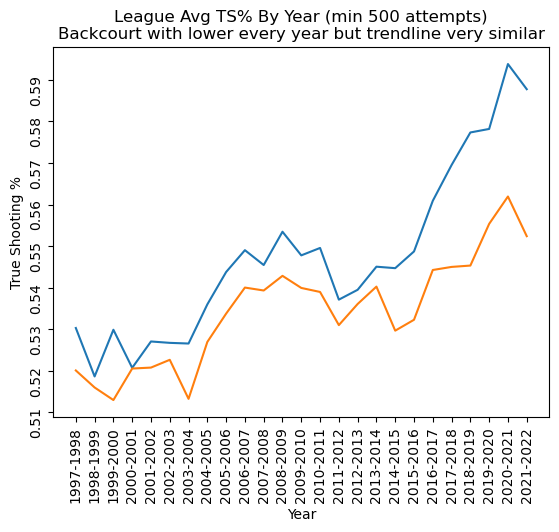

In [23]:
fig, ax = plt.subplots()
ax.plot(tsa_frontcourt.groupby(by='Year').mean()['TS%'])
ax.plot(tsa_backcourt.groupby(by='Year').mean()['TS%'])
ax.set_title(
    'League Avg TS% By Year (min 500 attempts)\nBackcourt with lower every year but trendline very similar'
    )
ax.set_ylabel('True Shooting %')
ax.set_xlabel('Year')
ax.tick_params(rotation=90)


In [24]:
three_point_shooting = stats[stats['t3PA'] > 55]

In [25]:
three_point_shooting['t3PA'].describe()

count    6159.000000
mean      200.076473
std       120.362013
min        56.000000
25%       104.000000
50%       170.000000
75%       268.000000
max      1030.000000
Name: t3PA, dtype: float64

<AxesSubplot:xlabel='Year'>

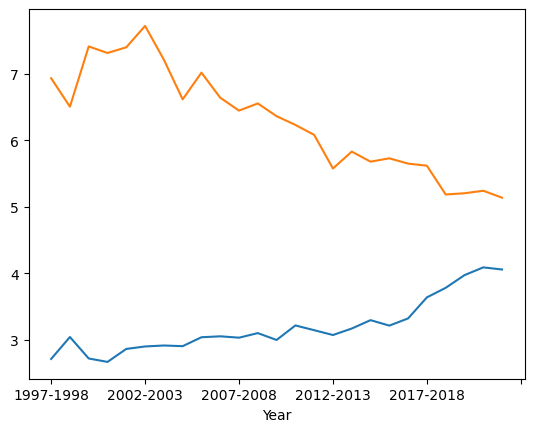

In [26]:
three_point_shooting.groupby(by='Year').mean()['3PA'].plot()
three_point_shooting.groupby(by='Year').mean()['2PA'].plot()

<AxesSubplot:xlabel='Year'>

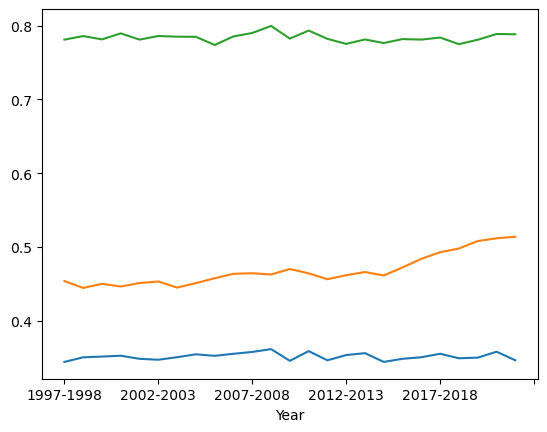

In [27]:
three_point_shooting.groupby(by='Year').mean()['3P%'].plot()
three_point_shooting.groupby(by='Year').mean()['2P%'].plot()
three_point_shooting.groupby(by='Year').mean()['FT%'].plot()

In [28]:
free_throw_shooting = stats[stats['tFTA'] > 125]

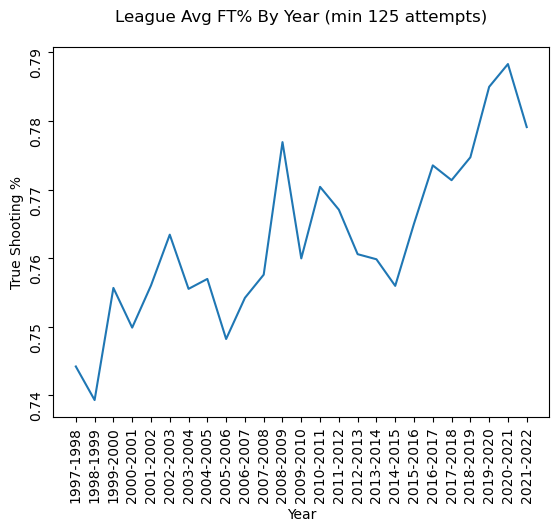

In [29]:
fig, ax = plt.subplots()
ax.plot(free_throw_shooting.groupby(by='Year').mean()['FT%'])
ax.set_title(
    'League Avg FT% By Year (min 125 attempts)\n'
    )
ax.set_ylabel('True Shooting %')
ax.set_xlabel('Year')
ax.tick_params(rotation=90)
plt.show()

<AxesSubplot:xlabel='Year'>

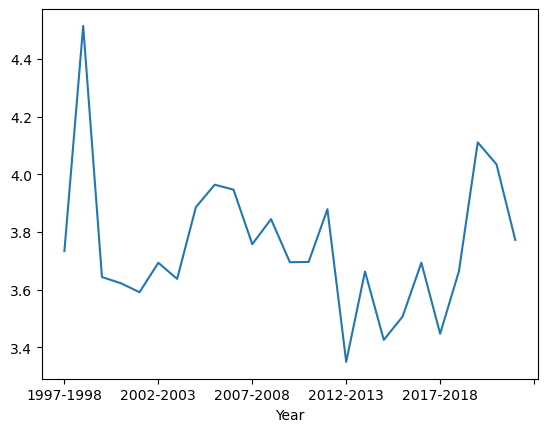

In [35]:
free_throw_shooting.groupby(by='Year').mean()['FTA'].plot()

<AxesSubplot:title={'center':'Average tFTA has generally declined over time'}, xlabel='Year'>

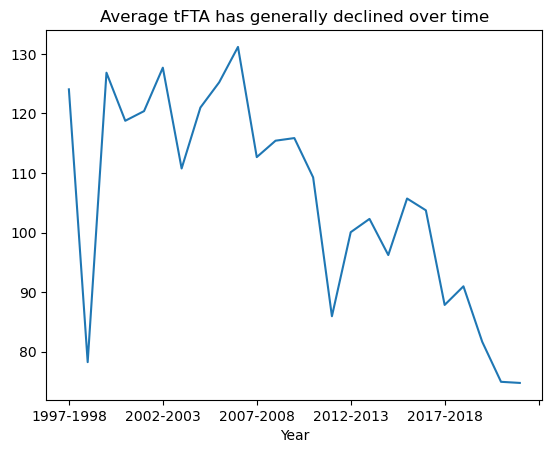

In [39]:
league_average_stats_by_year['tFTA'].plot(
                                        title='Average tFTA has generally declined over time'
                                        )

## Takeaways from analyzing shooting numbers

# Explore Starters


Year
1997-1998    23.700743
1998-1999    15.094378
1999-2000    24.806982
2000-2001    23.910985
2001-2002    25.213849
2002-2003    26.075949
2003-2004    22.953125
2004-2005    23.081597
2005-2006    23.602888
2006-2007    25.392505
2007-2008    22.793515
2008-2009    23.347295
2009-2010    23.291740
2010-2011    22.537338
2011-2012    19.158672
2012-2013    22.535461
2013-2014    21.406977
2014-2015    21.024922
2015-2016    22.518453
2016-2017    22.006826
2017-2018    19.854962
2018-2019    19.625179
2019-2020    17.433022
2020-2021    16.831897
2021-2022    16.692403
Name: GS, dtype: float64